<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/Homework_A_CLASSIFIER_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frist Deep Learning In Pytorch with CIFAR-1O**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, 
                                        download=True, 
                                        transform= transforms)

trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False,
                                       download = True, transform = transforms)

testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size,
                                         shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32])
torch.Size([4])


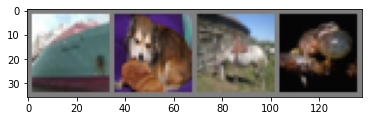

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [ ]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss == 0.0

print('Finished Training')

[1,  2000] loss: 2.171
[1,  4000] loss: 4.036
[1,  6000] loss: 5.714


KeyboardInterrupt: ignored

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
testiter = iter(testloader)
images, labels = testiter.next()

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)

    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)

    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:5s} is: {:.1f} %".format(classname,accuracy))

# **Second Deep Learning In Pytorch with CIFAR-1O**

https://medium.com/@sergioalves94/deep-learning-in-pytorch-with-cifar-10-dataset-858b504a6b54

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [3]:
dataset = CIFAR10(root='data/', download=True,
                  transform = ToTensor())
test_dataset = CIFAR10(root='data/', train=False,
                       transform = ToTensor())


Extracting data/cifar-10-python.tar.gz to data/


In [4]:
classes = dataset.classes
print(classes)
print(len(dataset.targets))
print(dataset.filename)
print(dataset.meta)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000
cifar-10-python.tar.gz
{'filename': 'batches.meta', 'key': 'label_names', 'md5': '5ff9c542aee3614f3951f8cda6e48888'}


In [5]:
class_count = {}
for _, index in dataset:
  label = classes[index]
  if label not in class_count:
    class_count[label] = 0
  class_count[label] += 1
class_count

{'airplane': 5000,
 'automobile': 5000,
 'bird': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'ship': 5000,
 'truck': 5000}

In [6]:
torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size

In [7]:
train_dataset, val_dataset = random_split(
    dataset,
    [train_size, val_size])
print(len(train_dataset))
print(len(val_dataset))

45000
5000


In [8]:
batch_size = 128

In [9]:
train_loader = DataLoader(
    train_dataset, batch_size,
    shuffle = True,
    num_workers = 4,
    pin_memory = True
)

val_loader = DataLoader(
    train_dataset, batch_size * 2,
    num_workers = 4,
    pin_memory = True
)

test_loader = DataLoader(
    train_dataset, batch_size * 2,
    num_workers = 4,
    pin_memory = True
)


images.shape: torch.Size([128, 3, 32, 32])
torch.Size([3, 274, 546])


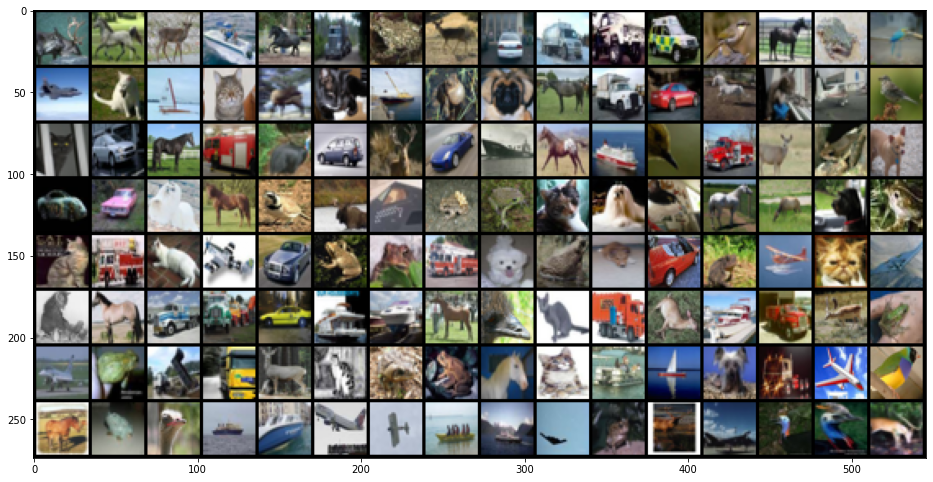

In [10]:
for image, _ in train_loader:
  print(f'images.shape: {image.shape}')
  plt.figure(figsize=(16,16))
  print(make_grid(image, nrow=16).shape)
  plt.imshow(make_grid(image, nrow=16).permute((1, 2, 0)))
  break

In [11]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [12]:
class ImageClassificationBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss' : loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [13]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # Training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history 

In [14]:
torch.cuda.is_available()

True

In [15]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [16]:
device = get_default_device()
device

device(type='cuda')

In [17]:
def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device
  
  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

In [18]:
def plot_losses(history):
  losses = [x['val_loss'] for x in history]
  plt.plot(losses, '-x')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('Loss vs. No. of epochs')

In [19]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuaracy vs. No. of epochs')

In [20]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [21]:
input_size = 3*32*32
output_size = 18

In [22]:
class CIFAR10Model(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(input_size, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, output_size)

  def forward(self, xb):
    out = xb.view(xb.size(0), -1)
    out = self.linear1(out)
    out = F.relu(out)
    out = self.linear2(out)
    out = F.relu(out)
    out = self.linear3(out)
    return out

In [24]:
model = to_device(CIFAR10Model(), device)

In [26]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.043805040419101715, 'val_loss': 2.9108498096466064}]

In [27]:
history += fit(10, 1e-1, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9265, val_acc: 0.3124
Epoch [1], val_loss: 1.7554, val_acc: 0.3678
Epoch [2], val_loss: 1.7237, val_acc: 0.3864
Epoch [3], val_loss: 1.7907, val_acc: 0.3724
Epoch [4], val_loss: 1.6424, val_acc: 0.4054
Epoch [5], val_loss: 1.7332, val_acc: 0.3937
Epoch [6], val_loss: 1.6073, val_acc: 0.4308
Epoch [7], val_loss: 1.5150, val_acc: 0.4538
Epoch [8], val_loss: 1.5092, val_acc: 0.4508
Epoch [9], val_loss: 1.4466, val_acc: 0.4835


In [28]:
history += fit(10, 1e-2, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3185, val_acc: 0.5332
Epoch [1], val_loss: 1.3100, val_acc: 0.5349
Epoch [2], val_loss: 1.3032, val_acc: 0.5394
Epoch [3], val_loss: 1.2943, val_acc: 0.5439
Epoch [4], val_loss: 1.2953, val_acc: 0.5432
Epoch [5], val_loss: 1.2901, val_acc: 0.5424
Epoch [6], val_loss: 1.2790, val_acc: 0.5489
Epoch [7], val_loss: 1.2702, val_acc: 0.5518
Epoch [8], val_loss: 1.2688, val_acc: 0.5511
Epoch [9], val_loss: 1.2629, val_acc: 0.5521


In [29]:
history += fit(10, 1e-3, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2543, val_acc: 0.5579
Epoch [1], val_loss: 1.2533, val_acc: 0.5583
Epoch [2], val_loss: 1.2525, val_acc: 0.5579
Epoch [3], val_loss: 1.2517, val_acc: 0.5592
Epoch [4], val_loss: 1.2511, val_acc: 0.5585
Epoch [5], val_loss: 1.2504, val_acc: 0.5587
Epoch [6], val_loss: 1.2497, val_acc: 0.5587
Epoch [7], val_loss: 1.2494, val_acc: 0.5589
Epoch [8], val_loss: 1.2485, val_acc: 0.5601
Epoch [9], val_loss: 1.2480, val_acc: 0.5608


In [30]:
history += fit(10, 1e-4, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2477, val_acc: 0.5597
Epoch [1], val_loss: 1.2476, val_acc: 0.5595
Epoch [2], val_loss: 1.2475, val_acc: 0.5595
Epoch [3], val_loss: 1.2474, val_acc: 0.5593
Epoch [4], val_loss: 1.2473, val_acc: 0.5599
Epoch [5], val_loss: 1.2472, val_acc: 0.5597
Epoch [6], val_loss: 1.2472, val_acc: 0.5599
Epoch [7], val_loss: 1.2471, val_acc: 0.5601
Epoch [8], val_loss: 1.2471, val_acc: 0.5600
Epoch [9], val_loss: 1.2470, val_acc: 0.5600


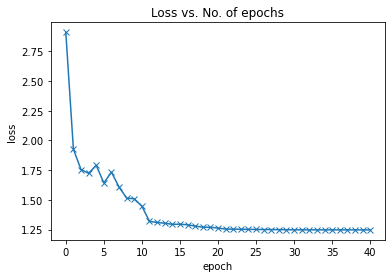

In [31]:
plot_losses(history)

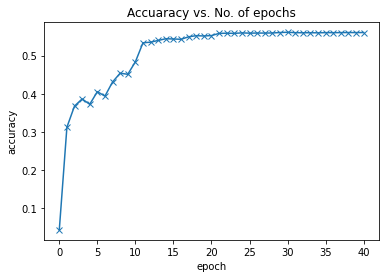

In [32]:
plot_accuracies(history)

In [33]:
evaluate(model, test_loader)

{'val_acc': 0.5600443482398987, 'val_loss': 1.2469987869262695}